In [82]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
import random;
import math;
import matplotlib.pyplot as plt


torch.manual_seed(12)
np.random.seed(12)
random.seed(12)

num_epochs = 20
batch_size = 50
learning_rate = 0.1

In [83]:
# DATA LOADING
train_dataset = dsets.FashionMNIST(root='downloaded',
                                    train=True,
                                    transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                                  transforms.ToTensor()]),
                                    download=False)

test_dataset = dsets.FashionMNIST(root='downloaded', 
                                     train=False, 
                                     transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                                  transforms.ToTensor()]),
                                     download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);


labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

print('data downloaded')

data downloaded


In [84]:
def data_visualization(wrong_predicted_indices, batch_index, predicted):
    fig = plt.figure(figsize=(8,8));
    columns = 5;
    rows = len(wrong_predicted_indices) // 5 + 1;
    for i, index in enumerate(wrong_predicted_indices):
        img = test_dataset.test_data[(batch_index * batch_size + index).item()].numpy()
        fig.add_subplot(rows, columns, i + 1)
        plt.title(labels_map[predicted[index].item()])
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()

In [85]:
class SimpleConvNet(torch.nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.fnn = torch.nn.Linear(3*3*64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fnn(out)
        return out

In [86]:
def train_model(model, optimizer, epoch):
    criterion = torch.nn.CrossEntropyLoss()
    model.train()
 
    total = len(train_dataset)    
    correct = 0
    
    for batch_index, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
        loss = criterion(outputs, labels)        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    acc = 100 * correct / total
    print('model trained', epoch)
    return loss, acc

In [87]:
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_index, (images, labels) in enumerate(test_loader):
            images = Variable(images.float())
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
            wrong_predicted_indices = torch.nonzero(torch.where(predicted != labels, 
                                                        torch.ones_like(predicted),
                                                        torch.zeros_like(predicted)))
            # data_visualization(wrong_predicted_indices, batch_index, predicted)
    return 100 * correct / total

cnn created
model trained 0
model trained 1
model trained 2
model trained 3
model trained 4
model trained 5
model trained 6
model trained 7
model trained 8
model trained 9
model trained 10
model trained 11
model trained 12
model trained 13
model trained 14
model trained 15
model trained 16
model trained 17
model trained 18
model trained 19


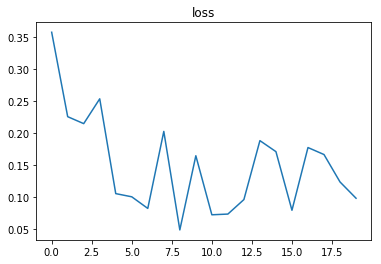

In [88]:
cnn_model = SimpleConvNet()
cnn_model_optimizer = torch.optim.SGD(cnn_model.parameters(), lr=learning_rate)
print('cnn created')
    
train_losses = []
train_accuracy = []
test_accuracy = []
for epoch in range(num_epochs):
    loss, acc = train_model(cnn_model, cnn_model_optimizer, epoch)
    train_losses.append(loss)
    train_accuracy.append(acc)
    test_acc = test_model(cnn_model)
    test_accuracy.append(test_acc)
    
x = [i for i in range(num_epochs)]
plt.title('loss')
plt.plot(x, train_losses)
plt.show()   

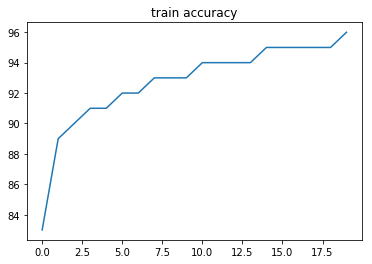

In [89]:
plt.title('train accuracy')
plt.plot(x, train_accuracy)
plt.show()

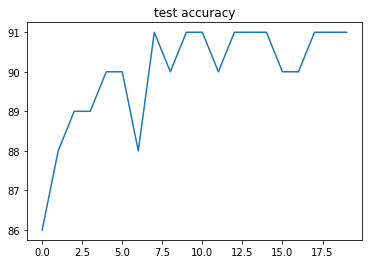

In [90]:
plt.title('test accuracy')
plt.plot(x, test_accuracy)
plt.show()